In [26]:
import glob
import os 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import hermione as hm



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '14_ngenes_ncells_droplet')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta                #1f77b4
Bladder              #aec7e8
Brain_Myeloid        #ff7f0e
Brain_Non-Myeloid    #ffbb78
Diaphragm            #2ca02c
Fat                  #98df8a
Heart                #d62728
Heart_and_Aorta      #d62728
Kidney               #ff9896
Large_Intestine      #9467bd
Limb_Muscle          #c5b0d5
Liver                #8c564b
Lung                 #c49c94
Mammary_Gland        #e377c2
Marrow               #f7b6d2
Pancreas             #7f7f7f
Skin                 #c7c7c7
Spleen               #bcbd22
Thymus               #dbdb8d
Tongue               #17becf
Trachea              #9edae5
Name: color, dtype: object

In [27]:
import glob
import os 
 
globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print('number of tissues: ', len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(55656, 4)
number of tissues:  12


,nGene,nUMI,orig.ident,tissue
10X_P4_2_AAACCTGAGCTACCTA,1854,8116,10X,Liver
10X_P4_2_AAACCTGCAAGACACG,913,1748,10X,Liver
10X_P4_2_AAACCTGCATGCCTTC,2234,8838,10X,Liver
10X_P4_2_AAACCTGGTATCTGCA,690,1648,10X,Liver
10X_P4_2_AAACGGGTCCGCATAA,705,1492,10X,Liver


In [28]:
nreads_ngenes['log10_nUMI'] = np.log10(nreads_ngenes['nUMI'])

In [29]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')

In [30]:
# Convert colors to dict to force mapping of tissue name to color
colors = colors.to_dict()
colors

{'Aorta': '#1f77b4',
 'Bladder': '#aec7e8',
 'Brain Myeloid': '#ff7f0e',
 'Brain Non-Myeloid': '#ffbb78',
 'Diaphragm': '#2ca02c',
 'Fat': '#98df8a',
 'Heart': '#d62728',
 'Heart and Aorta': '#d62728',
 'Kidney': '#ff9896',
 'Large Intestine': '#9467bd',
 'Limb Muscle': '#c5b0d5',
 'Liver': '#8c564b',
 'Lung': '#c49c94',
 'Mammary Gland': '#e377c2',
 'Marrow': '#f7b6d2',
 'Pancreas': '#7f7f7f',
 'Skin': '#c7c7c7',
 'Spleen': '#bcbd22',
 'Thymus': '#dbdb8d',
 'Tongue': '#17becf',
 'Trachea': '#9edae5'}

In [31]:
tissues = sorted(nreads_ngenes['tissue'].unique())
tissues = [tissue.replace('_', ' ') for tissue in tissues]
tissues

['Bladder',
 'Heart and Aorta',
 'Kidney',
 'Limb Muscle',
 'Liver',
 'Lung',
 'Mammary Gland',
 'Marrow',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [32]:
kwargs = dict(data=nreads_ngenes, row='tissue', kdeplot_kws=dict(zorder=-1),
               row_order=tissues, palette=colors, xlabel_suffix='')

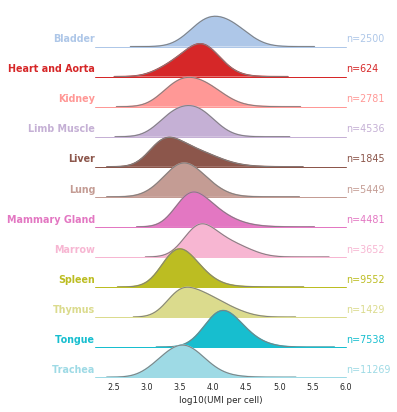

In [33]:
g = hm.horizonplot(x='log10_nUMI', **kwargs)
g.set_xlabels('log10(UMI per cell)')
for ax in g.axes.flatten():

#     # Add white gridlines
#     xticks = ax.get_xticks()
#     xmin, xmax, ymin, ymax = ax.axis()
#     ax.vlines(xticks, ymin, 1.2*ymax, color='white', clip_on=False, linewidth=1)
#     ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    # Remove ticklabels except for last row
    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)


g.savefig('figure1f_horizonplot_log10_UMI_per_cell.pdf')